# Guión y animaciones 

In [1]:
from manim import *
import numpy as np

config.media_width = "75%"
config.verbosity = "WARNING"

Manim Community v0.16.0.post0

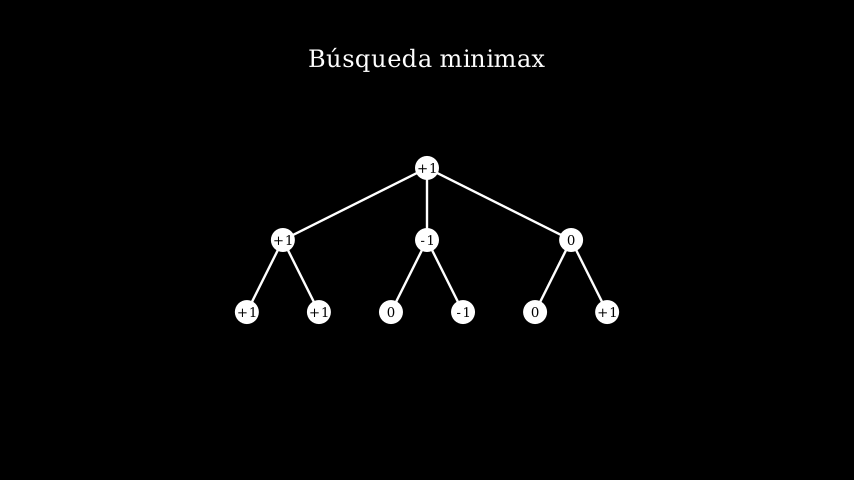

In [179]:
%%manim -ql Greetings

class Greetings(Scene):
    def construct(self):
        tree_layout_scale = 3

        G = nx.Graph()
        G.add_node(0)

        nodes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
        edges = [(0, 1), (0, 2),(0, 3), (1, 4), (2, 5), (3, 6), (1, 7), (2, 8), (3, 9)]


        for node in nodes:
            G.add_node(node)
        for edge in edges:
            G.add_edge(edge[0], edge[1])

        # Search trees
        
        pos_dot = LabeledDot(label=Text("+1", font_size=16, color=BLACK), radius=0.2)
        neg_dot = LabeledDot(label=Text("-1", font_size=16, color=BLACK), radius=0.2)
        zero_dot = LabeledDot(label=Text("0", font_size=16, color=BLACK), radius=0.2)
        question_dot = LabeledDot(label=Text("?", font_size=16, color=BLACK), radius=0.2)
        
        title = Text("Búsqueda minimax").scale(0.6).shift(3 * UP)
        
        tree = Graph(list(G.nodes), 
                  list(G.edges), 
                  layout="tree", 
                  root_vertex=0,
                  labels=False,
                  layout_scale=tree_layout_scale,
                               vertex_mobjects = {
                                   0: pos_dot.copy(),
                                   1: zero_dot.copy(),
                                   2: neg_dot.copy(),
                                   3: pos_dot.copy(),
                                   4: pos_dot.copy(),
                                   5: neg_dot.copy(),
                                   6: pos_dot.copy(),
                                   7: zero_dot.copy(),
                                   8: zero_dot.copy(),
                                   9: pos_dot.copy()
                               })
        
        self.add(tree, title)

GUIÓN: Presentación del problema

En este video, explicaremos el funcionamiento del algoritmo "búsqueda minimax". Este algoritmo permite implementar programas capaces de competir en juegos contra un adversario, donde el truco consistirá en construir nuestro programa de manera tal que pueda predecir los diferentes caminos que puede tomar el juego.

In [2]:
%%manim -ql Memory

class Memory(Scene):
    def construct(self):
        
        table_scale = 0.3
        
        # Tables
        
        cross = VGroup(
            Line(UP + LEFT, DOWN + RIGHT),
            Line(UP + RIGHT, DOWN + LEFT)).set_color(RED).scale(0.5)
        
        circle = Circle().set_color(BLUE).scale(0.5)
        blank = Square().set_color(BLACK).scale(0.5)
        
        loss_token = cross.copy().set_color(BLACK)
        win_token = circle.copy().set_color(BLACK)
        center_token = circle.copy().set_color(BLACK)
        
        almost_loss = MobjectTable(
            [[loss_token, cross.copy(), blank.copy()],
            [cross.copy(), circle.copy(), circle.copy()],
            [cross.copy(), blank.copy(), blank.copy()]]
        ).add_background_rectangle(color=BLACK, opacity=1).scale(table_scale)
        
        almost_win = MobjectTable(
            [[win_token, cross.copy(), cross.copy()],
            [cross.copy(), circle.copy(), circle.copy()],
            [cross.copy(), blank.copy(), circle.copy()]]
        ).add_background_rectangle(color=BLACK, opacity=1).scale(table_scale).next_to(almost_loss, 3 *DOWN)
        
        take_center = MobjectTable(
            [[blank, blank.copy(), blank.copy()],
            [blank.copy(), center_token, blank.copy()],
            [blank.copy(), blank.copy(), blank.copy()]]
        ).add_background_rectangle(color=BLACK, opacity=1).scale(table_scale).next_to(almost_win, 3 *DOWN).shift(2 * LEFT)
        
        tables = VGroup(almost_win, almost_loss).shift(2 * LEFT)
        focus = Square(color=YELLOW).scale(0.3).move_to(loss_token.get_center())
        
        loss_rule = Text("Bloquear opciones de victoria del oponente").scale(0.4).next_to(almost_loss, RIGHT)
        win_rule = Text("Tomar opciones de victoria").scale(0.4).next_to(almost_win, RIGHT)
        why_bother = Text("¿Por qué molestarnos en predecir?")
        memory = Text("¡Usemos memoria!").next_to(why_bother, DOWN)
        why_bother_group = VGroup(why_bother, memory)
        memory_title = Text("Solución con reglas en memoria").scale(0.6)
        
        # Animations
        
        self.play(Create(why_bother_group), runtime=5)
        self.wait(2)
        self.play(Transform(why_bother_group, memory_title))
        self.play(why_bother_group.animate().shift(3 * UP))
        self.play(FadeIn(tables))
        self.play(FadeIn(focus))
        self.play(loss_token.animate.set_color(RED))
        self.play(Create(loss_rule))
        self.wait(2)
        self.play(focus.animate().move_to(win_token.get_center()))
        self.play(win_token.animate().set_color(BLUE))
        self.play(Create(win_rule))
        self.wait(2)
        tables.add(take_center)
        self.play(
            FadeOut(why_bother_group), 
            focus.animate().shift(3 * UP),
            tables.animate().shift(3 * UP), 
            win_rule.animate().shift(3 * UP), 
            loss_rule.animate().shift(3 * UP),
            runtime=0.5
        )
        take_center_rule = Text("Tomar el centro del tablero").scale(0.4).next_to(take_center, RIGHT)
        self.play(focus.animate().move_to(center_token.get_center()), 
                  center_token.animate.set_color(BLUE))
        self.play(Create(take_center_rule))    
        self.wait(2)
        etc = Text("etc...").scale(0.6).next_to(tables, 3 * DOWN)
        self.play(FadeIn(etc), FadeOut(focus))
        self.wait(2)
        

GUIÓN: Gato como ejemplo simplificado del problema

¿Pero por qué molestarnos en predecir el juego? Quizás podríamos simplificarnos la vida si, en lugar de anticipar todo lo que va a pasar, identificamos diferentes tipos de situaciones que pueden suceder en un juego, y guardamos en la memoria reglas que podamos usar cuando sea conveniente.

Un ejemplo muy simple. Tenemos los siguientes tableros de gato, somos los círculos y es nuestro turno. 

* Cualquiera que haya jugado a este juego sabrá que, si no bloqueamos la opción de victoria de los círculos, lo más problable es que perdamos en la siguiente jugada. 

* Al mismo tiempo, si tenemos una opción de victoria inmediata, lo lógico es tomarla. 

* Podemos repetir este ejecicio con otro tipo de situaciones más elaboradas y terminar con un programa que juegue al gato como lo haría una persona.



In [4]:
%%manim -ql MemoryProblem

class MemoryProblem(Scene):
    def construct(self):
        table_scale = 0.3
        
        # Tables
        
        cross = VGroup(
            Line(UP + LEFT, DOWN + RIGHT),
            Line(UP + RIGHT, DOWN + LEFT)).set_color(RED).scale(0.5)
        
        circle = Circle().set_color(BLUE).scale(0.5)
        blank = Square().set_color(BLACK).scale(0.5)
        red_circle = circle.copy().set_color(RED)
        
        table = MobjectTable(
            [[circle.copy(), cross.copy(), blank.copy()],
            [cross.copy(), circle.copy(), circle.copy()],
            [cross.copy(), blank.copy(), blank.copy()]]
        ).add_background_rectangle(color=BLACK, opacity=1).scale(table_scale).shift(2 * LEFT)
        
        connect4_table = MobjectTable(
            [[blank.copy(), blank.copy(), blank.copy(), blank.copy(), blank.copy(), blank.copy(), blank.copy()],
            [blank.copy(), blank.copy(), blank.copy(), blank.copy(), blank.copy(), blank.copy(), blank.copy()],
             [blank.copy(), blank.copy(), blank.copy(), blank.copy(), blank.copy(), blank.copy(), blank.copy()],
             [blank.copy(), blank.copy(), blank.copy(), red_circle.copy(), blank.copy(), blank.copy(), blank.copy()],
             [blank.copy(), blank.copy(), circle.copy(), red_circle.copy(), blank.copy(), blank.copy(), blank.copy()],
             [blank.copy(), red_circle.copy(), red_circle.copy(), red_circle.copy(), blank.copy(), blank.copy(), blank.copy()],
             [circle.copy(), circle.copy(), red_circle.copy(), circle.copy(), red_circle.copy(), blank.copy(), blank.copy()]]
        ).add_background_rectangle(color=BLACK, opacity=1).scale(table_scale).shift(2 * LEFT)
        
        
        problem = Text("Problema: Muchos tableros posibles")
        tictactoe_complexity = Text("Para el gato: 9! = 362.800").next_to(problem, DOWN)
        problem_title = Text("Problema de las reglas en memoria").scale(0.6)
        
        rule_1 = Text("Regla 1").scale(0.4)
        rule_2 = Text("Regla 2").scale(0.4).next_to(rule_1, DOWN)
        rule_3 = Text("Regla 3").scale(0.4).next_to(rule_2, DOWN)
        dots = Text("...").scale(0.4).next_to(rule_3, DOWN)
        rule_n = Text("Regla n").scale(0.4).next_to(dots, DOWN)
        
        
        rules_group = VGroup(rule_1, rule_2, rule_3, dots, rule_n)
        rules_group.next_to(table, 2 * RIGHT)
        
        tedious = Text("Tedioso...").next_to(table, 2 * RIGHT).scale(0.6)
        super_tedious = Text("Más tedioso aún...").scale(0.6).next_to(connect4_table, 2 * RIGHT)
        
        other_way = Text("Quizás convenga probar lo de anticipar el juego").scale(0.8)
        
        
        # Animations
        
        self.play(Create(problem))
        self.wait(2)
        self.play(Create(tictactoe_complexity))
        self.wait(2)
        
        problem_group = VGroup(problem, tictactoe_complexity)
        self.play(Transform(problem_group, problem_title))
        self.play(problem_group.animate().shift(3 * UP))
        
        self.play(FadeIn(table))
        self.wait(2)
        self.play(Create(rules_group))
        self.wait(2)
        self.play(Transform(rules_group, tedious))
        self.wait(2)
        self.play(Transform(table, connect4_table), Transform(rules_group, super_tedious))
        self.wait(2)
        self.clear()
        self.play(Create(other_way))
        self.wait(2)


Sin embargo, tenemos un problema: los juegos tienen muchos tableros posibles que tendríamos que considerar. El gato, con solo 9 espacios, tiene 9! formas de jugar. 

Si queremos ser exhaustivos, tendriamos que considerar todos los escenarios posibles que nos puedan aparecer, lo que naturalmente son muchas reglas para programar.

Si quisieramos luego usar el mismo método para un juego más complejo, como el "conecta 4", la tarea pasa a ser aún más compleja, por lo que vale la pena darle la oportunidad a la idea de anticipar los resultados del juego.


In [114]:
%%manim -ql GamePrediction
import networkx as nx

class GamePrediction(Scene):
    def construct(self):
        
        tree_layout_scale = 4
        table_scale = 0.2
        
        # Tables
        
        cross = VGroup(
            Line(UP + LEFT, DOWN + RIGHT),
            Line(UP + RIGHT, DOWN + LEFT)).set_color(RED).scale(0.5)
        circle = Circle().set_color(BLUE).scale(0.5)
        blank = Circle().set_color(BLACK).scale(0.5)
        
        base_table = MobjectTable(
            [[blank.copy(), cross.copy(), blank.copy()],
            [cross.copy(), circle.copy(), circle.copy()],
            [cross.copy(), blank.copy(), blank.copy()]]
        ).add_background_rectangle(color=BLACK, opacity=1).scale(table_scale)
        
        first_loss_table = MobjectTable(
            [[blank.copy(), cross.copy(), blank.copy()],
            [cross.copy(), circle.copy(), circle.copy()],
            [cross.copy(), blank.copy(), circle.copy()]]
        ).add_background_rectangle(color=BLACK, opacity=1).scale(table_scale)
        
        base_min_table = first_loss_table.copy()
        
        second_loss_table = MobjectTable(
            [[blank.copy(), cross.copy(), blank.copy()],
            [cross.copy(), circle.copy(), circle.copy()],
            [cross.copy(), circle.copy(), blank.copy()]]
        ).add_background_rectangle(color=BLACK, opacity=1).scale(table_scale)

        third_loss_table = MobjectTable(
            [[blank.copy(), cross.copy(), circle.copy()],
            [cross.copy(), circle.copy(), circle.copy()],
            [cross.copy(), blank.copy(), blank.copy()]]
        ).add_background_rectangle(color=BLACK, opacity=1).scale(table_scale)

        tie_table = MobjectTable(
            [[circle.copy(), cross.copy(), blank.copy()],
            [cross.copy(), circle.copy(), circle.copy()],
            [cross.copy(), blank.copy(), blank.copy()]]
        ).add_background_rectangle(color=BLACK, opacity=1).scale(table_scale)
        
        min_loss_table_1 = MobjectTable(
            [[blank.copy(), cross.copy(), blank.copy()],
            [cross.copy(), circle.copy(), circle.copy()],
            [cross.copy(), cross.copy(), circle.copy()]]
        ).add_background_rectangle(color=BLACK, opacity=1).scale(table_scale)
        
        min_loss_table_2 = MobjectTable(
            [[blank.copy(), cross.copy(), cross.copy()],
            [cross.copy(), circle.copy(), circle.copy()],
            [cross.copy(), blank.copy(), circle.copy()]]
        ).add_background_rectangle(color=BLACK, opacity=1).scale(table_scale)
        
        min_win_table = MobjectTable(
            [[cross.copy(), cross.copy(), blank.copy()],
            [cross.copy(), circle.copy(), circle.copy()],
            [cross.copy(), blank.copy(), blank.copy()]]
        ).add_background_rectangle(color=BLACK, opacity=1).scale(table_scale)
        
        
        # Trees
        
        G = nx.Graph()
        G.add_node(0)

        nodes = [0, 1, 2, 3, 4]
        edges = [(0, 1), (0, 2),(0, 3), (0, 4)]


        for node in nodes:
            G.add_node(node)
        for edge in edges:
            G.add_edge(edge[0], edge[1])

        # Search trees

        base_tree = Graph(list(G.nodes), 
                  list(G.edges), 
                  layout="tree", 
                  root_vertex=0,
                  labels=False,
                  layout_scale=tree_layout_scale,
                          vertex_config={     
                      1: {"fill_color": BLACK},
                      2: {"fill_color": BLACK},
                      3: {"fill_color": BLACK},
                      4: {"fill_color": BLACK}
                  },
                          edge_config={
                      (0, 1): {"stroke_color": BLACK},
                      (0, 2): {"stroke_color": BLACK},
                      (0, 3): {"stroke_color": BLACK},
                      (0, 4): {"stroke_color": BLACK}
                  },
                  vertex_mobjects={0: base_table})
                 
        
        second_tree = Graph(list(G.nodes), 
                  list(G.edges), 
                  layout="tree", 
                  root_vertex=0,
                  labels=False,
                  layout_scale=tree_layout_scale,
                            
                            vertex_mobjects = {
                  0: base_table,
                  1: first_loss_table,
                  2: second_loss_table,
                  3: third_loss_table,
                  4: tie_table})
        

        turn_next = Text("MAX (O)").scale(0.6)
        focus = Square(color=YELLOW).scale(0.7)
        

        turn = Text("¿En qué consiste anticipar el juego?")
        players = Text("Max (O) v/s Min (X)").next_to(turn, DOWN)
                
        win = Text("Victoria", color = BLUE)
        loss = Text("Derrota", color = RED).next_to(win, DOWN)
        tie = Text("Empate", color = YELLOW).next_to(loss, DOWN)
        none_of_above = Text("No terminal").next_to(tie, DOWN)
        
        utilities_group = VGroup(win, loss, tie, none_of_above).scale(0.4).move_to(2 * UP + 4 * RIGHT)
                        
        # Animations
        
        self.play(Create(turn))
        self.wait(2)
        self.play(Transform(turn, players))
        self.wait(2)
        self.play(Transform(turn, turn_next))                
        self.play(FadeIn(base_tree), turn.animate.shift(3 * UP))        
        self.wait(2)
        
        
        self.play(Transform(base_tree, second_tree))
        self.wait(2)
        
        self.play(Create(win))
        self.wait(2)
        self.play(Create(loss))
        self.wait(2)
        self.play(Create(tie))
        self.wait(2)
        self.play(Create(none_of_above))
        
        focus.move_to(first_loss_table.get_center())
        
        self.play(FadeIn(focus))
        stamps_group = VGroup()
        stamp1 = Text("?").scale(0.5).next_to(focus, DOWN)
        stamps_group.add(stamp1)
        self.play(FadeIn(stamp1))
        
        self.play(focus.animate.move_to(second_loss_table.get_center()))
        stamp2 = Text("?").scale(0.5).next_to(focus, DOWN)
        stamps_group.add(stamp2)
        self.play(FadeIn(stamp2))
        
        self.play(focus.animate.move_to(third_loss_table.get_center()))
        stamp3 = Text("?").scale(0.5).next_to(focus, DOWN)
        stamps_group.add(stamp3)
        self.play(FadeIn(stamp3))
        
        self.play(focus.animate.move_to(tie_table.get_center()))
        stamp4 = Text("?").scale(0.5).next_to(focus, DOWN)
        stamps_group.add(stamp4)
        self.play(FadeIn(stamp4))
        self.play(focus.animate.move_to(first_loss_table.get_center()))
        
        self.wait(2)
        
        self.play(FadeOut(base_tree), 
                  first_loss_table.animate.move_to(base_table.get_center()),
                  FadeOut(stamps_group),
                  FadeOut(focus),
                  FadeOut(turn),
                  runtime=0.1
                 )
        
         # Trees
        
        G = nx.Graph()
        G.add_node(0)

        nodes = [0, 1, 2, 3]
        edges = [(0, 1), (0, 2),(0, 3)]


        for node in nodes:
            G.add_node(node)
        for edge in edges:
            G.add_edge(edge[0], edge[1])

        # Search trees

        base_tree = Graph(list(G.nodes), 
                  list(G.edges), 
                  layout="tree", 
                  root_vertex=0,
                  labels=False,
                  layout_scale=tree_layout_scale,
                          vertex_config={     
                      1: {"fill_color": BLACK},
                      2: {"fill_color": BLACK},
                      3: {"fill_color": BLACK}
                  },
                          edge_config={
                      (0, 1): {"stroke_color": BLACK},
                      (0, 2): {"stroke_color": BLACK},
                      (0, 3): {"stroke_color": BLACK}
                  },
                  vertex_mobjects={0: base_min_table})
                 
        
        second_tree = Graph(list(G.nodes), 
                  list(G.edges), 
                  layout="tree", 
                  root_vertex=0,
                  labels=False,
                  layout_scale=tree_layout_scale,
                            vertex_mobjects = {
                  0: base_min_table,
                  1: min_loss_table_1,
                  2: min_loss_table_2,
                  3: min_win_table})
        
        turn = Text("MIN (X)").scale(0.6).shift(3 * UP)
        focus = Square(color=YELLOW).scale(0.7)
        
        # Animations
                
        self.play(FadeIn(turn), Transform(first_loss_table, base_tree))        
        self.play(Transform(base_tree, second_tree))
        self.wait(2)
        
        focus.move_to(min_loss_table_1.get_center())
        
        self.play(FadeIn(focus))
        
        stamps_group = VGroup()
        stamp1 = Text("?").scale(0.5).next_to(focus, DOWN)
        stamps_group.add(stamp1)
        self.play(FadeIn(stamp1))
        
        self.play(focus.animate.move_to(min_loss_table_2.get_center()))
        stamp2 = Text("?").scale(0.5).next_to(focus, DOWN)
        stamps_group.add(stamp2)
        self.play(FadeIn(stamp2))
        
        self.play(focus.animate.move_to(min_win_table.get_center()))
        stamp3 = cross.copy().scale(0.5).next_to(focus, DOWN)
        stamps_group.add(stamp3)
        self.play(FadeIn(stamp3), focus.animate.set_color(RED))
        self.wait(2)
        self.play(focus.animate.move_to(base_min_table.get_center()))
        stamp4 = cross.copy().scale(0.5).next_to(focus, LEFT)
        stamps_group.add(stamp4)
        self.play(FadeIn(stamp4))
        self.wait(2)
        self.play(focus.animate.move_to(min_loss_table_1.get_center()))
        self.play(focus.animate.set_color(YELLOW))
        self.wait(2)
        
        
        
        
        

¿Pero en qué consiste exactamente anticipar el juego?

En el contexto de juegos con adversario, es básicamente realizar el ejercicio de simular el desarrollo del juego alternando entre nuestra perspectiva o la de nuestro oponente.

Esta simulación puede explicarse mediante una analogía útil. Supongamos que tenemos dos jugadores imaginarios: Max y Min. Max está jugando con los círculos y  Min juega con las cruces. Nuestra metología para decidir qué hacer será simular un juego entre Max y Min, y buscar la jugada que sea más beneficiosa para Max.

Lo primero que Max tiene que hacer es mirar los resultados a los que conducen las diferentes jugadas que puede hacer desde un tablero en particular. Una vez que los tengamos, Max tiene que mirar cada uno de los tableros, y evaluarlo en base a si es una victoria, derrota o un empate. La idea aquí es elegir la jugada que lleve al mejor resultdado para Max.

Si evaluamos todos los tableros sucesores de este tablero, tenemos que ninguno es victoria, derrota o empate. Un tablero así se denomina no terminal. Cuando Max se enfrenta a un estado no terminal, significa que habrá que simular el turno de Min para saber a qué resultado nos llevará eventualmente esa jugada. 

Hagamos este proceso para el tablero de más a la derecha y simulemos el turno de Min desde ahí. Min está igual de interesado que Max en ganar, de modo que también va a buscar los tableros a los que conducen cada jugada que tiene disponible, y luego evaluar cada uno de estos en base a si es una victoria, derrota o empate para sí mismo. En este caso, Min detecto una victoria para sí mismo, de modo que optará por la jugada asociada al tablero de la izquierda. Así, el tablero que evaluamos inicialmente podrá ser etiquetado como una derrota para Max, expresando un principio importante: Un estado no terminal que evalúa Max será tan bueno como el peor de sus hijos.

Para los estados no terminales que encuentre Min, se tendrá que volver nuevamente a tomar la perspectiva de Max y repetir el procedimiento.


In [178]:
%%manim -ql MinimaxValue

import networkx as nx


class MinimaxValue(Scene):
    def construct(self):
        # Trees
        tree_layout_scale = 3

        G = nx.Graph()
        G.add_node(0)

        nodes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
        edges = [(0, 1), (0, 2),(0, 3), (1, 4), (2, 5), (3, 6), (1, 7), (2, 8), (3, 9)]


        for node in nodes:
            G.add_node(node)
        for edge in edges:
            G.add_edge(edge[0], edge[1])

        # Search trees
        
        pos_dot = LabeledDot(label=Text("+1", font_size=16, color=BLACK), radius=0.2)
        neg_dot = LabeledDot(label=Text("-1", font_size=16, color=BLACK), radius=0.2)
        zero_dot = LabeledDot(label=Text("0", font_size=16, color=BLACK), radius=0.2)
        question_dot = LabeledDot(label=Text("?", font_size=16, color=BLACK), radius=0.2)
        
        base_max_tree = Graph(list(G.nodes), 
                  list(G.edges), 
                  layout="tree", 
                  root_vertex=0,
                  labels=False,
                  layout_scale=tree_layout_scale,
                          vertex_config={     
                      1: {"fill_color": BLACK},
                      2: {"fill_color": BLACK},
                      3: {"fill_color": BLACK},
                      4: {"fill_color": BLACK},
                      5: {"fill_color": BLACK},
                      6: {"fill_color": BLACK},
                      7: {"fill_color": BLACK},
                      8: {"fill_color": BLACK},
                      9: {"fill_color": BLACK}
                  },
                          edge_config={
                      (0, 1): {"stroke_color": BLACK},
                      (0, 2): {"stroke_color": BLACK},
                      (0, 3): {"stroke_color": BLACK},
                      (1, 4): {"stroke_color": BLACK},
                      (2, 5): {"stroke_color": BLACK},
                      (3, 6): {"stroke_color": BLACK},
                      (1, 7): {"stroke_color": BLACK},
                      (2, 8): {"stroke_color": BLACK},
                      (3, 9): {"stroke_color": BLACK}
                  },
                  vertex_mobjects={0: question_dot.copy()}
                         ).shift(UP)
        
        second_max_tree = Graph(list(G.nodes), 
                  list(G.edges), 
                  layout="tree", 
                  root_vertex=0,
                  labels=False,
                  layout_scale=tree_layout_scale,
                            vertex_config={
                      4: {"fill_color": BLACK},
                      5: {"fill_color": BLACK},
                      6: {"fill_color": BLACK},
                      7: {"fill_color": BLACK},
                      8: {"fill_color": BLACK},
                      9: {"fill_color": BLACK}
                  },
                            edge_config={
                      (1, 4): {"stroke_color": BLACK},
                      (2, 5): {"stroke_color": BLACK},
                      (3, 6): {"stroke_color": BLACK},
                      (1, 7): {"stroke_color": BLACK},
                      (2, 8): {"stroke_color": BLACK},
                      (3, 9): {"stroke_color": BLACK}
                            },
                            vertex_mobjects = {
                  0: question_dot.copy(),
                  1: question_dot.copy(),
                  2: question_dot.copy(),
                  3: question_dot.copy()}).shift(UP)
        
        third_max_tree = Graph(list(G.nodes), 
                  list(G.edges), 
                  layout="tree", 
                  root_vertex=0,
                  labels=False,
                  layout_scale=tree_layout_scale,
                               vertex_mobjects = {
                                   0: question_dot.copy(),
                                   1: question_dot.copy(),
                                   2: question_dot.copy(),
                                   3: question_dot.copy(),
                                   4: pos_dot.copy(),
                                   5: neg_dot.copy(),
                                   6: pos_dot.copy(),
                                   7: zero_dot.copy(),
                                   8: zero_dot.copy(),
                                   9: pos_dot.copy()
                               }).shift(UP)
        
        fourth_max_tree = Graph(list(G.nodes), 
                  list(G.edges), 
                  layout="tree", 
                  root_vertex=0,
                  labels=False,
                  layout_scale=tree_layout_scale,
                               vertex_mobjects = {
                                   0: question_dot.copy(),
                                   1: zero_dot.copy(),
                                   2: neg_dot.copy(),
                                   3: pos_dot.copy(),
                                   4: pos_dot.copy(),
                                   5: neg_dot.copy(),
                                   6: pos_dot.copy(),
                                   7: zero_dot.copy(),
                                   8: zero_dot.copy(),
                                   9: pos_dot.copy()
                               }).shift(UP)
        
        fifth_max_tree = Graph(list(G.nodes), 
                  list(G.edges), 
                  layout="tree", 
                  root_vertex=0,
                  labels=False,
                  layout_scale=tree_layout_scale,
                               vertex_mobjects = {
                                   0: pos_dot.copy(),
                                   1: zero_dot.copy(),
                                   2: neg_dot.copy(),
                                   3: pos_dot.copy(),
                                   4: pos_dot.copy(),
                                   5: neg_dot.copy(),
                                   6: pos_dot.copy(),
                                   7: zero_dot.copy(),
                                   8: zero_dot.copy(),
                                   9: pos_dot.copy()
                               }).shift(UP)
                
        
        
        level1 = Text("h = 0: MAX").scale(0.6).shift(5 * LEFT + 2 * UP)
        level2 = Text("h = 1: MIN").scale(0.6).next_to(level1, 3 * DOWN)
        level3 = Text("h = 2: MAX").scale(0.6).next_to(level2, 3 * DOWN)
        
        # Score function
        
        template = TexTemplate()
        template.add_to_preamble(r"\usepackage{amsmath}",
                                r"\usepackage{amssymb}")
        
        minimax_function = MathTex(r"\text{minimax($s$)} = ",
                                 r"""\begin{cases}
                                 utility(s) \qquad &\text{si $s$ es terminal} \cr
                                 max\{minimax(\text{$s'$): $s'$ hijo de }$s$\}\qquad &\text{si es el turno de Max en $s$} \cr
                                 min\{minimax(\text{$s'$): $s'$ hijo de }$s$\}\qquad &\text{si es el turno de Min en $s$} \cr
                                 \end{cases}""",
                                 tex_template=template).scale(0.7)
        
        

        
        utility_function = MathTex(r"\text{utility($s$)} = ",
                                 r"""\begin{cases}
                                 1 \qquad &\text{si $s$ es una victoria de Max} \cr
                                 -1 \qquad &\text{si $s$ es una derrota de Max} \cr
                                 0 \qquad &\text{si $s$ es un empate} \cr 
                                 \end{cases}""",
                                 tex_template=template).scale(0.7)
        minimax = Text("En caso de llevar a tableros no terminales, simular la elección de Min en ese escenario").scale(0.4)
        utility = Text("Verificar si las jugadas disponibles llevan a una victoria, derrota o un empate").scale(0.4)
        
        utility.next_to(minimax, UP)
        utility_function.next_to(minimax_function, UP)
        
        functions_group = VGroup(utility, minimax)
        evaluation_max = Text("Dos formas de evaluar un estado").scale(0.6)
        
        focus = Rectangle(color=YELLOW, width=6, height = 0.5)
        focus.move_to(utility_function.get_center() + 1.2 * RIGHT + 0.5 * UP)
        
        minimax_focus = Rectangle(color=YELLOW, width=10, height = 0.5)
        minimax_focus.move_to(minimax_function.get_center() + 1.25 * RIGHT + 0.5 * UP)
        
        title = Text("Cálculo de la utilidad de un nodo").scale(0.6).shift(3 * UP)
        
        
        # Animations

        self.play(Create(evaluation_max))
        self.wait()
        self.play(Transform(evaluation_max, functions_group))
        self.wait()
        self.play(FadeOut(evaluation_max), FadeIn(title))
        self.wait()
        self.play(FadeIn(utility_function), FadeIn(minimax_function))
        self.wait()
        self.play(FadeIn(focus))
        self.wait()
        self.play(focus.animate.shift(0.5 * DOWN))
        self.wait()
        self.play(focus.animate.shift(0.5 * DOWN))
        
        self.play(FadeOut(focus))
        
        self.play(FadeIn(minimax_focus))
        self.wait()
        self.play(minimax_focus.animate.shift(0.5 * DOWN))
        self.wait()
        self.play(minimax_focus.animate.shift(0.5 * DOWN))
        self.wait()
        self.play(FadeOut(minimax_focus), FadeOut(utility_function))
        
        self.play(minimax_function.animate().next_to(base_max_tree, 4 * DOWN))
        self.wait()
                
        self.play(FadeIn(base_max_tree), 
                  FadeIn(level1), 
                  level1.animate().set_color(YELLOW))
        self.wait()
        
        self.play(Transform(base_max_tree, second_max_tree), 
                  FadeIn(level2),
                  level2.animate().set_color(YELLOW), 
                  level1.animate().set_color(WHITE))
        self.wait()
        
        self.play(Transform(base_max_tree, third_max_tree), 
                  FadeIn(level3),
                  level2.animate().set_color(WHITE), 
                  level3.animate().set_color(YELLOW))
        self.wait()
        
        self.play(Transform(base_max_tree, fourth_max_tree),
                 level2.animate().set_color(YELLOW), 
                  level3.animate().set_color(WHITE))
        self.wait()
        
        self.play(Transform(base_max_tree, fifth_max_tree),
                  level2.animate().set_color(WHITE), 
                  level1.animate().set_color(YELLOW))
        self.wait()
        
        
        
                

GUIÓN: Puntaje minimax

Formalicemos un poco más lo que hicimos recién. La manera de evaluar una jugada que Max empleó consistia en dos casos posibles:
* Verificar si las jugadas disponibles llevan a una victoria, derrota o un empate
* En caso de llevar a tableros no terminales, simular la elección de Min en ese escenario para evaluar la jugada

Estos dos casos se fomalizan en las siguientes expresiones: utility y minimax, para asignar puntajes a tableros terminales y no terminales, respectivamente.

Utility asigna tres puntajes a tableros terminales: 1 para victorias de Max, -1 para derrotas de Max y 0 para empates.

Minimax es una generalización de Utility para estados no terminales. Recibirá un tablero cualquiera y, en caso de no ser terminal, tomará, ya sea el máximo valor del puntaje de los tableros del siguiente nivel, si estamos en el turno de Max, o el Mínimo valor del puntaje de los tableros del siguiente nivel, si estamos en el turno de Min. En caso de ser, terminal, tomará el valor de la utilidad del estado. En este punto se explican los nombres de los jugadores de la simulación Max maximiza los puntajes, mientras que Min minimiza los puntajes.

Veamos un ejemplo. Vamos a calcular el valor minimax para asignar un puntaje al nodo raíz. El primer estado no es terminal, de modo tendremos que obtener el valor minimax de todos los estados sucesores. En el nivel 1, nos encontramos con que los estados tampoco son terminales, de modo que, nuevamente, para cada uno de estos tendremos que obtener los estados sucesores. Finalmente, llegamos al nivel 2, cuyos estados son terminales, de modo que el valor minimax será la utilidad de los nodos.

Ahora propagaremos el valor hacia los niveles más bajos. En el nivel 1 es el turno de Min, por lo que el valor minimax para cada nodo será el mínimo de los valores sus respectivos nodos hijo. En el nivel 0 es el turno de Max, de modo que el valor minimax del nodo raíz será el máximo valor minimax de los nodos del nivel 1 de profundidad.

Notamos que una vez que se disponen de estas etiquetas para todo el árbol de juego, elegir la mejor jugada desde un estado $s$ se reduce a elegir la jugada asociada al valor minimax($s$).

In [171]:
%%manim -ql EvaluationFunction
import networkx as nx

class EvaluationFunction(Scene):
    def construct(self):
        
        tree_layout_scale = 4
        table_scale = 0.2
        
        # Tables
                
        cross = VGroup(
            Line(UP + LEFT, DOWN + RIGHT),
            Line(UP + RIGHT, DOWN + LEFT)).set_color(RED).scale(0.5)
        circle = Circle().set_color(BLUE).scale(0.5)
        blank = Circle().set_color(BLACK).scale(0.5)
        
        base_table = MobjectTable(
            [[blank.copy(), cross.copy(), blank.copy()],
            [cross.copy(), circle.copy(), circle.copy()],
            [cross.copy(), blank.copy(), blank.copy()]]
        ).add_background_rectangle(color=BLACK, opacity=1)
        
        first_loss_table = MobjectTable(
            [[blank.copy(), cross.copy(), blank.copy()],
            [cross.copy(), circle.copy(), circle.copy()],
            [cross.copy(), blank.copy(), circle.copy()]]
        ).add_background_rectangle(color=BLACK, opacity=1)

        second_loss_table = MobjectTable(
            [[blank.copy(), cross.copy(), blank.copy()],
            [cross.copy(), circle.copy(), circle.copy()],
            [cross.copy(), circle.copy(), blank.copy()]]
        ).add_background_rectangle(color=BLACK, opacity=1)

        third_loss_table = MobjectTable(
            [[blank.copy(), cross.copy(), circle.copy()],
            [cross.copy(), circle.copy(), circle.copy()],
            [cross.copy(), blank.copy(), blank.copy()]]
        ).add_background_rectangle(color=BLACK, opacity=1)

        tie_table = MobjectTable(
            [[circle.copy(), cross.copy(), blank.copy()],
            [cross.copy(), circle.copy(), circle.copy()],
            [cross.copy(), blank.copy(), blank.copy()]]
        ).add_background_rectangle(color=BLACK, opacity=1)
        
        
        # Trees
        
        G = nx.Graph()
        G.add_node(0)

        nodes = [0, 1, 2, 3, 4]
        edges = [(0, 1), (0, 2),(0, 3), (0, 4)]


        for node in nodes:
            G.add_node(node)
        for edge in edges:
            G.add_edge(edge[0], edge[1])

        # Search trees

        base_tree = Graph(list(G.nodes), 
                  list(G.edges), 
                  layout="tree", 
                  root_vertex=0,
                  labels=False,
                  layout_scale=tree_layout_scale,
                          vertex_config={     
                      1: {"fill_color": BLACK},
                      2: {"fill_color": BLACK},
                      3: {"fill_color": BLACK},
                      4: {"fill_color": BLACK}
                  },
                          edge_config={
                      (0, 1): {"stroke_color": BLACK},
                      (0, 2): {"stroke_color": BLACK},
                      (0, 3): {"stroke_color": BLACK},
                      (0, 4): {"stroke_color": BLACK}
                  },
                  vertex_mobjects={0: base_table.copy().scale(table_scale)}).shift(0.7 * UP)
        
        second_tree = Graph(list(G.nodes), 
                  list(G.edges), 
                  layout="tree", 
                  root_vertex=0,
                  labels=False,
                  layout_scale=tree_layout_scale,
                  vertex_mobjects = {
                  0: base_table.copy().scale(table_scale),
                  1: first_loss_table.copy().scale(table_scale),
                  2: second_loss_table.copy().scale(table_scale),
                  3: third_loss_table.copy().scale(table_scale),
                  4: tie_table.copy().scale(table_scale)}).shift(0.7 * UP)
        
        third_tree = Graph(list(G.nodes), 
                  list(G.edges), 
                  layout="tree", 
                  root_vertex=0,
                  labels=False,
                  layout_scale=tree_layout_scale,
                  vertex_mobjects = {
                  0: base_table.copy().scale(table_scale),
                  1: first_loss_table.copy().scale(table_scale),
                  2: second_loss_table.copy().scale(table_scale),
                  3: third_loss_table.copy().scale(table_scale),
                  4: tie_table.copy().scale(table_scale)}).shift(0.7 * UP)
        
        
        # Score function (with h and eval function)
        
        template = TexTemplate()
        template.add_to_preamble(r"\usepackage{amsmath}",
                                r"\usepackage{amssymb}")
        
        minimax_function = MathTex(r"\text{minimax($s$, $h$)} = ",
                                 r"""\begin{cases}
                                 utility(s) \qquad &\text{si $s$ es terminal} \cr
                                 eval(s) \qquad &\text{si $h = 0$} \cr
                                 max\{minimax(\text{$s'$, $h-1$): $s'$ hijo de }$s$\}\qquad &\text{si es el turno de Max en $s$} \cr
                                 min\{minimax(\text{$s'$, $h-1$): $s'$ hijo de }$s$\}\qquad &\text{si es el turno de Min en $s$} \cr
                                 \end{cases}""",
                                 tex_template=template).scale(0.7)
        
        title = Text("Detalle final: Nuevamente tenemos problemas de escala").scale(0.6)
        title2 = Text("Podemos modificar el valor minimax").scale(0.6)
        title3 = Text("Nuevo valor Minimax").scale(0.6).shift(3.6 * UP)
        
        evaluation_function = Text("Función de evaluación: Estimación sobre el valor de un tablero").scale(0.4)
        evaluation_function.next_to(minimax_function, DOWN)

        # Animations
        self.play(Create(title))
        self.wait()
        self.play(Transform(title, title2))
        self.wait()
        self.play(Transform(title, title3))
        self.wait()
        self.play(FadeIn(minimax_function))
        self.wait()
        self.play(Create(evaluation_function))
        self.wait()
        self.play(FadeOut(minimax_function), FadeOut(evaluation_function))
                
        tree = base_tree.copy()
        
        eval_function = MathTex(r"eval = \text{opciones de victoria Max} - \text{opciones de victoria Min}").scale(0.7)
        eval_function.next_to(title, DOWN)
        
        self.play(FadeIn(tree), FadeIn(eval_function))
        self.wait()
        self.play(Transform(tree, second_tree))
        self.wait()
                
        evaluation_square = Square(color=YELLOW).scale(0.7)
        
        evaluation_square.shift(0.6 * DOWN + 4 * RIGHT)
        first_evaluation = MathTex(r"eval = 2 - 2 = 0").scale(0.7)
        first_evaluation.next_to(evaluation_square, DOWN)
        
        self.play(FadeIn(evaluation_square), FadeIn(first_evaluation))
        self.wait()
        
        self.play(FadeOut(evaluation_square), FadeOut(first_evaluation))
        evaluation_square.shift(8 * LEFT)
        second_evaluation = MathTex(r"eval = 2 - 1 = 1").scale(0.7)
        second_evaluation.next_to(evaluation_square, DOWN)
        self.wait()
        
        evaluation_square.set_color(GREEN)
        self.play(FadeIn(evaluation_square), FadeIn(second_evaluation), Transform(tree, third_tree))
        self.wait()
        

GUIÓN: ¿Qué pasa si no podemos explorar el árbol completo?

Un último comentario sobre los alcances de la solución. Calcular el valor minimax requiere que hagamos una exploración completa del arbol de estados del juego; eso es equivalente a simular todo desarrollo posible de un juego desde el el inicio. Para un juego como el gato, con 9! estados, podemos efectivamente hacer eso sin problemas significativos de desempeño, pero rápidamente se vuelve imposible de hacer para juegos de más complejidad.

Sin embargo, podemos hacer una transa y ceder precisión a cambio de explorar menos estados del juego. Esto es posible si modificamos el valor minimax para incluir una altura máxima $h$, y para entregar el valor de una de evaluación en caso de haberse alcanzado la altura máxima.

La función de evaluación será un procedimiento que nos otorga una estimación sobre qué tan bueno es un estado en particular, pese a no ser un empate o victoria de alguno de los jugadores. 

Retomemos brevemente el ejemplo del gato, pero ahora limitando la profundidad de la simulación al nivel 1 de profundidad. Como función de evaluación, podemos optar por el siguiente método:

evaluación = opciones de victoria Max - opciones de victorioa Min

Si aplicamos ese criterio para el tablero hijo de más a la derecha, notamos que existen dos opciones de victoria para Max (diagonal y columna derecha) y dos opciones de victoria para Min (fila superior y columna izquierda), de modo que nuestra evaluación asignará un puntaje de cero a dicho estado. Es posible verificar que, en base a este criterio, casi todos los tableros tienen un puntaje de cero. 

Para el tablero de la izquierda, no obstante, podemos verificar que Max tiene dos opciones de victoria (diagonal y columna derecha) mientras que min tiene solo una (fila inferior), de modo que nuestra evaluación otorgará un puntaje de 1 en este caso.

Así, vemos que es posible tomar la misma decisión que se tomaría al explorar el árbol completo, pero recorriendo solamente un nivel de profundidad. La calidad de la decisión de nuestro agente queda condicionada a la calidad de la estimación que elijamos. Si bien para este caso en concreto no se observan diferencias, en otras situaciones es posible que nuestro agente tome decisiones sub-óptimas.